# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](https://github.com/Usama-Amjad/Basic_Image_Classification/blob/master/images/1_1.png?raw=1)

### Import TensorFlow

In [1]:
import tensorflow as tf
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [3]:
# (numbert of examples,height,width)
x_train.shape,y_train.shape,x_test.shape,y_test.shape,

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Plot an Image Example

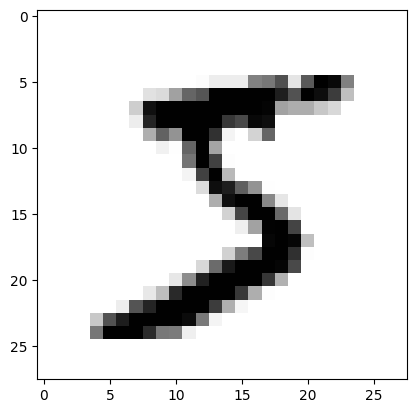

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[0]

5

In [6]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)


### Validated Shapes

In [8]:
y_train_encoded.shape,y_test_encoded.shape

((60000, 10), (10000, 10))

### Display Encoded Labels

In [9]:
# Checking if it is correct
y_train[0],y_train_encoded[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](https://github.com/Usama-Amjad/Basic_Image_Classification/blob/master/images/1_2.png?raw=1)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](https://github.com/Usama-Amjad/Basic_Image_Classification/blob/master/images/1_3.png?raw=1)

### Neural Networks

![Neural Network with 2 hidden layers](https://github.com/Usama-Amjad/Basic_Image_Classification/blob/master/images/1_4.png?raw=1)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

In [11]:
x_train_reshaped.shape,x_test_reshaped.shape
# (total number of sample,pixel value)

((60000, 784), (10000, 784))

### Display Pixel Values

In [13]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [14]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon=1e-10

x_train_norm = (x_train_reshaped-x_mean) / (x_std+epsilon)
x_test_norm = (x_test_reshaped-x_mean) / (x_std+epsilon)

### Display Normalized Pixel Values

In [15]:
x_train_norm[0]

array([-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42

# Task 6: Creating a Model
### Creating the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](https://github.com/Usama-Amjad/Basic_Image_Classification/blob/master/images/1_5.png?raw=1)

### Compiling the Model

In [18]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

### Evaluating the Model

# Task 8: Predictions

### Predictions on Test Set

### Plotting the Results